In [1]:
# !pip install art

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()


x_test = np.load('/home/jovyan/UNSW/x_test.npy',allow_pickle=True)
x_train = np.load('/home/jovyan/UNSW/x_train.npy',allow_pickle=True)
x_val = np.load('/home/jovyan/UNSW/x_val.npy',allow_pickle=True)
y_test = np.load('/home/jovyan/UNSW/y_test.npy',allow_pickle=True)
y_train = np.load('/home/jovyan/UNSW/y_train.npy',allow_pickle=True)
y_val = np.load('/home/jovyan/UNSW/y_val.npy',allow_pickle=True)

2024-02-27 22:41:13.449589: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 22:41:13.489777: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 22:41:13.489851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 22:41:13.490958: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 22:41:13.497355: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 22:41:13.498213: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

dnn_model = Sequential()
dnn_model.add(Input(shape=input_shape))
dnn_model.add(Dense(units=30, activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=num_classes, activation='softmax'))

dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
classifier = KerasClassifier(model=dnn_model, use_logits=False)
classifier.fit(x_train, y_train, nb_epochs=10, batch_size=64,validation_data=(x_val, y_val),
                     callbacks=[early_stopping])


test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

2024-02-27 22:41:16.965981: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-27 22:41:16.993575: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-02-27 22:41:17.014082: W tensorflow/c/c_api.cc:305] Operation '{name:'training/Adam/dense_2/bias/v/Assign' id:291 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_2/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_2/bias/v, training/Adam/dense_2/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model

Test accuracy: 0.86801904


/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-02-27 22:41:35.101912: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_2/Softmax' id:74 op device:{requested: '', assigned: ''} def:{{{node dense_2/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_2/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


epsilon = 0.1
FPR: [0.77322711 0.75991758]
TPR: [0.24008242 0.22677289]
FNR: [0.75991758 0.77322711]
TNR: [0.22677289 0.24008242]
Accuracy: 0.23102368146282826
Precision(micro,macro,weighted): 0.23102368146282826,0.25795213450325266,0.30519598076086174
F1(micro,macro,weighted: 0.23102368146282826,0.2263567131285234,0.24806296632459937
FPR: 0.7665723452431598
tpr: 0.23342765475684027
fnr: 0.7665723452431598
tnr: 0.23342765475684027


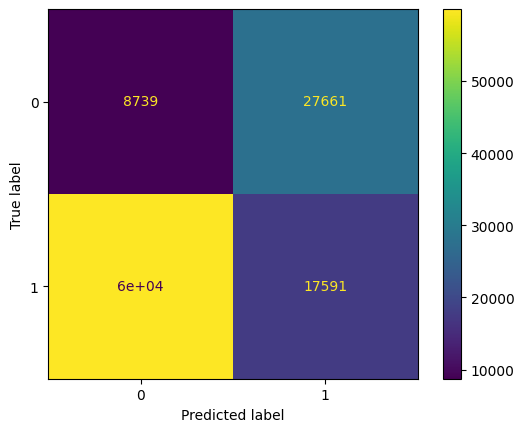

epsilon = 0.15
FPR: [0.952392   0.92258242]
TPR: [0.07741758 0.047608  ]
FNR: [0.92258242 0.952392  ]
TNR: [0.047608   0.07741758]
Accuracy: 0.05712856779356152
Precision(micro,macro,weighted): 0.05712856779356152,0.06790845521653967,0.07916688968272352
F1(micro,macro,weighted: 0.05712856779356152,0.05707298946718481,0.059688092638905746
FPR: 0.9374872098740876
tpr: 0.0625127901259123
fnr: 0.9374872098740876
tnr: 0.0625127901259123


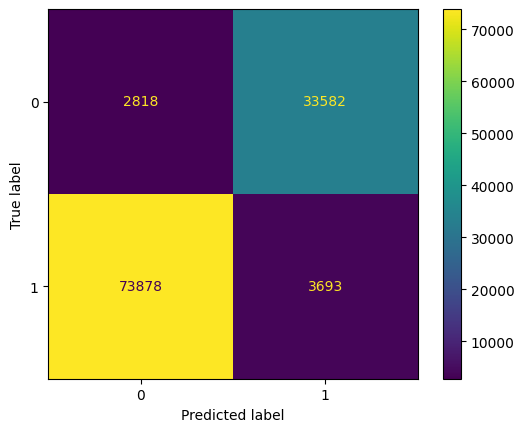

epsilon = 0.2
FPR: [0.98886182 0.95085165]
TPR: [0.04914835 0.01113818]
FNR: [0.95085165 0.98886182]
TNR: [0.01113818 0.04914835]
Accuracy: 0.023277851383246614
Precision(micro,macro,weighted): 0.023277851383246614,0.02357307497226936,0.02385560328131972
F1(micro,macro,weighted: 0.023277851383246614,0.02321350940755834,0.020349700238842746
FPR: 0.969856732633882
tpr: 0.030143267366118047
fnr: 0.969856732633882
tnr: 0.030143267366118047


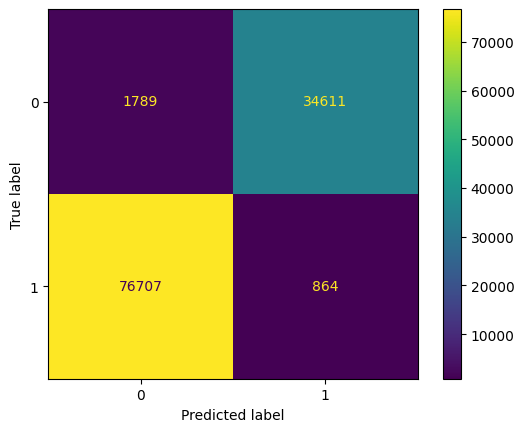

epsilon = 0.25
FPR: [0.99650643 0.95546703]
TPR: [0.04453297 0.00349357]
FNR: [0.95546703 0.99650643]
TNR: [0.00349357 0.04453297]
Accuracy: 0.01660071421677444
Precision(micro,macro,weighted): 0.01660071421677444,0.014135669283107843,0.011822333253293443
F1(micro,macro,weighted: 0.01660071421677444,0.01646271721631393,0.012254217582269628
FPR: 0.9759867296688564
tpr: 0.024013270331143633
fnr: 0.9759867296688564
tnr: 0.024013270331143633


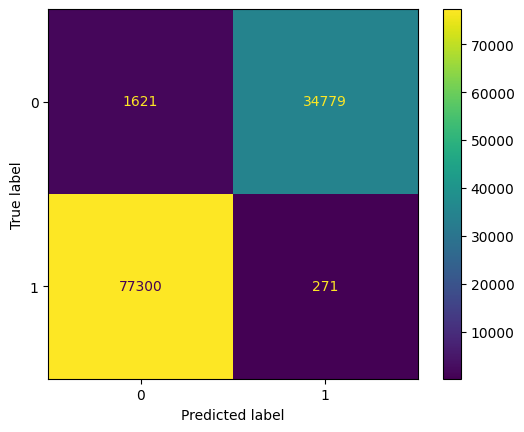

epsilon = 0.3
FPR: [0.99960037 0.99956044]
TPR: [0.00043956 0.00039963]
FNR: [0.99956044 0.99960037]
TNR: [0.00039963 0.00043956]
Accuracy: 0.0004123856068649042
Precision(micro,macro,weighted): 0.0004123856068649042,0.0005288000424502253,0.0006452993673933051
F1(micro,macro,weighted: 0.0004123856068649042,0.0004123682921767471,0.00045989249391802914
FPR: 0.9995804028383214
tpr: 0.00041959716167860964
fnr: 0.9995804028383214
tnr: 0.00041959716167860964


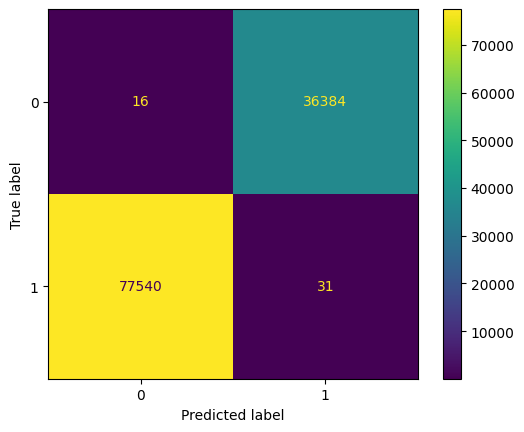

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from art.attacks.evasion import BasicIterativeMethod

epsilon_values = [0.1, 0.15, 0.2, 0.25, 0.3]

# Iterate over epsilon values
for epsilon in epsilon_values:
    # Craft adversarial samples with FGSM
    adv_crafter = BasicIterativeMethod(classifier, eps=epsilon, batch_size = 64, verbose=False)
    x_test_adv = adv_crafter.generate(x=x_test, y=y_test)

    # Evaluate the classifier on the adversarial examples
    preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    # acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
    # print("Test accuracy on adversarial sample (epsilon = %.2f): %.2f%%" % (epsilon, acc * 100))

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    # tn, fp, fn, tp = conf_matrix.ravel()
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : "dnn",
        "attack_model" : "BIM",
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/UNSW/modeldnn.csv", mode='a', index=False)
